In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

import sys, os
sys.path.insert(0, os.path.abspath(".."))

['/Users/azka/.local/share/uv/python/cpython-3.12.11-macos-x86_64-none/lib/python312.zip', '/Users/azka/.local/share/uv/python/cpython-3.12.11-macos-x86_64-none/lib/python3.12', '/Users/azka/.local/share/uv/python/cpython-3.12.11-macos-x86_64-none/lib/python3.12/lib-dynload', '', '/Users/azka/projects/b1-coding-practical-mt25/.venv/lib/python3.12/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

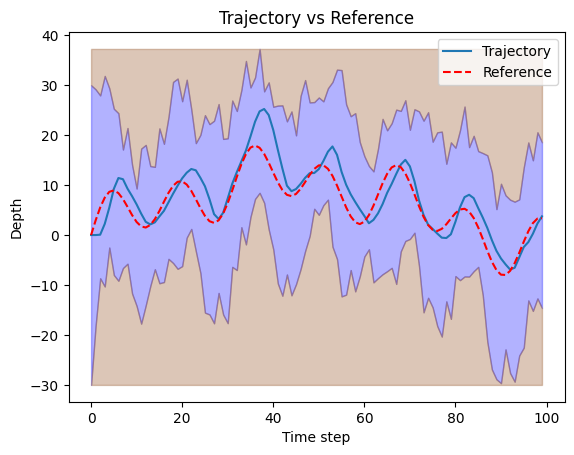

In [6]:
# Import relevant modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, PDController(kp=0.07, kd=0.6))
mission = Mission.from_csv("/Users/azka/Documents/01 Engineering Science/B1 Engineering Computation/b1-coding-practical-mt25/data/mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

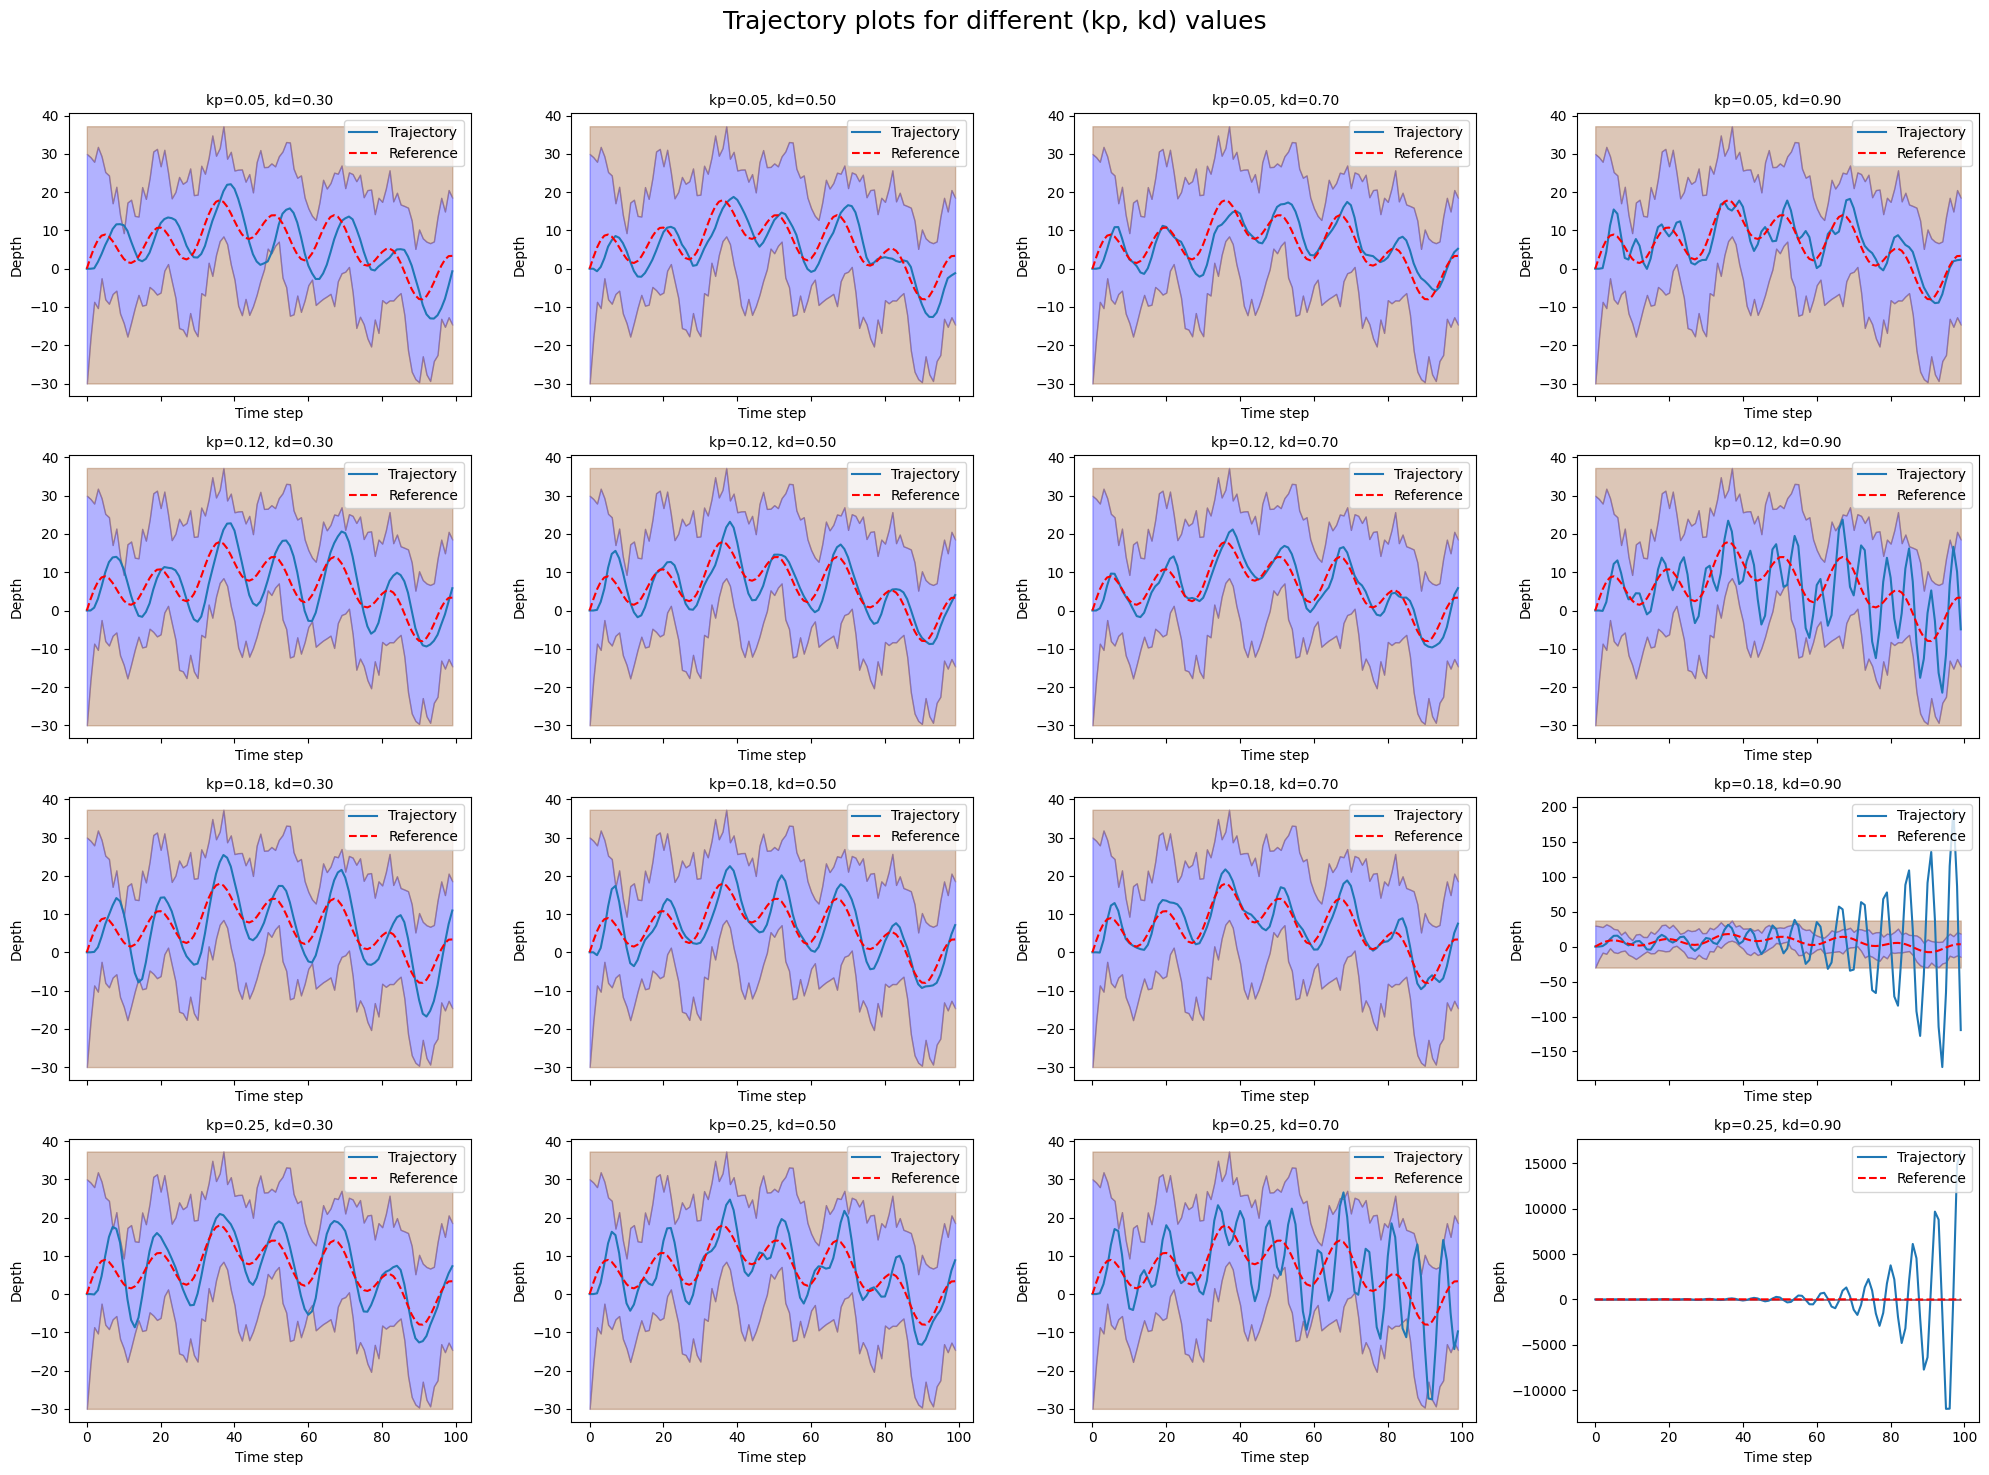

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

# Load the mission
mission = Mission.from_csv("/Users/azka/Documents/01 Engineering Science/B1 Engineering Computation/b1-coding-practical-mt25/data/mission.csv")

# Define controller ranges
kp_values = np.linspace(0.05, 0.25, 4)
kd_values = np.linspace(0.3, 0.9, 4)

# Create subplot grid
fig, axes = plt.subplots(len(kp_values), len(kd_values), figsize=(20, 15), sharex=True, sharey=False)
fig.suptitle("Trajectory plots for different (kp, kd) values", fontsize=18)

# Loop through parameter combinations
for i, kp in enumerate(kp_values):
    for j, kd in enumerate(kd_values):
        sub = Submarine()
        controller = PDController(kp=kp, kd=kd)
        closed_loop = ClosedLoop(sub, controller)

        trajectory = closed_loop.simulate_with_random_disturbances(mission)
        ax = axes[i, j]
        trajectory.plot_completed_mission(mission, ax=ax)
        ax.set_title(f"kp={kp:.2f}, kd={kd:.2f}", fontsize=10)
        ax.set_xlabel("Time step")
        ax.set_ylabel("Depth")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.show()
